## Supervised learning


In [ ]:
Binary Classification

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np

#For Decision Tree Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [20]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'feature_names', 'DESCR'])

In [21]:
X = pd.DataFrame(columns=data.feature_names, data=data.data)
y = pd.DataFrame(data=data.target)
X.shape, y.shape

((569, 30), (569, 1))

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=7)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [26]:
y_pred = clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)

0.9181286549707602

In [27]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 45,  10],
       [  4, 112]])

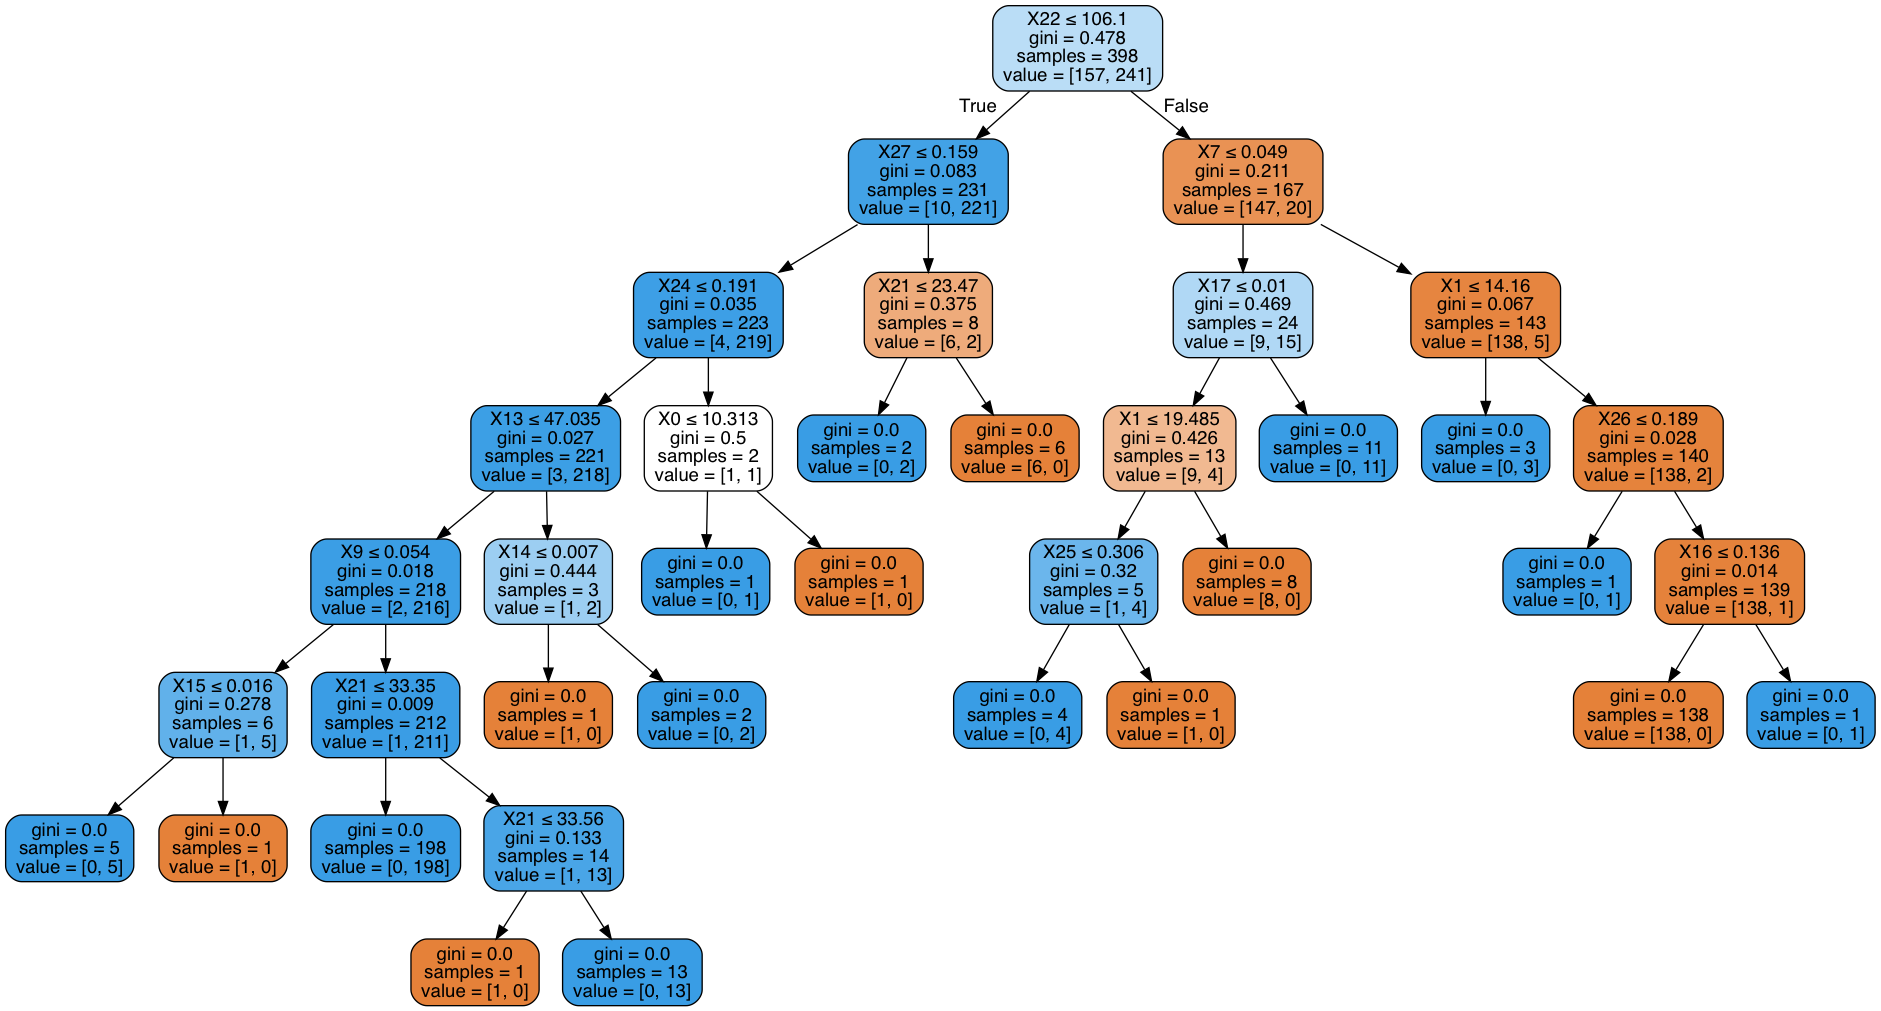

In [29]:
#Display the decion tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())